<a href="https://colab.research.google.com/github/Jangchanhi/Skt_opencv/blob/main/SFA_HPE_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python
!pip install numpy
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 37.2 MB/s eta 0:00:00


In [3]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

import numpy as np
import cv2
import colorsys

In [4]:

# init mediapipe task
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
PoseLandmarkerResult = mp.tasks.vision.PoseLandmarkerResult
VisionRunningMode = mp.tasks.vision.RunningMode

model_path = '/content/sample_data/pose_landmarker_full.task'
options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE, num_poses=1)

detector = vision.PoseLandmarker.create_from_options(options)

# for drawing limbs
pairs = list(mp.solutions.pose.POSE_CONNECTIONS)
colors = [tuple(int(255 * i) for i in colorsys.hsv_to_rgb(x / len(pairs), 1.0, 1.0)) for x in range(len(pairs))]


In [5]:
def draw_landmark(image, landmarks, pairs):
    # draw circles
    for idx, landmark in enumerate(landmarks):
      landmark_x = int(landmark.x * image_width)
      landmark_y = int(landmark.y * image_height)
      visibility = landmark.visibility
      image = cv2.circle(image, (landmark_x, landmark_y), 5, (255, 255, 255), -1)

    # draw limbs
    for pair_id, pair in enumerate(pairs):
      idx1 = pair[0]
      idx2 = pair[1]

      landmark_x_1 = int(landmarks[idx1].x * image_width)
      landmark_y_1 = int(landmarks[idx1].y * image_height)
      visibility_1 = landmarks[idx1].visibility

      landmark_x_2 = int(landmarks[idx2].x * image_width)
      landmark_y_2 = int(landmarks[idx2].y * image_height)
      visibility_2 = landmarks[idx1].visibility

      image = cv2.line(image, (landmark_x_1, landmark_y_1), (landmark_x_2, landmark_y_2), colors[pair_id], 2)


In [6]:
# Load the input image.
numpy_image = cv2.imread("/content/sample_data/male.jpg")
image_height, image_width = numpy_image.shape[:2]
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=numpy_image)


In [7]:
# Detect pose landmarks from the input image.
detection_result = detector.detect(mp_image)

pose_landmarks_list = detection_result.pose_landmarks
landmarks = pose_landmarks_list[0]

In [8]:
# Draw pose landmarks on the input image.
annotated_image = np.copy(numpy_image)
draw_landmark(annotated_image, landmarks, pairs)

In [10]:
from google.colab.patches import cv2_imshow

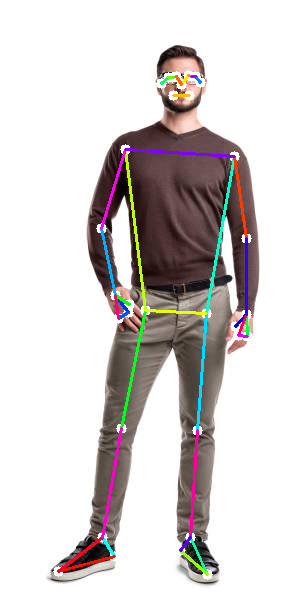

In [11]:
# cv2.imshow('frame', (annotated_image))

# cv2.waitKey(0)
# cv2.destroyAllWindows()

cv2_imshow(annotated_image)